---
title: "Unsupervised Learning"
author: "Nandini Kodali"
format:
    html: 
        code-fold: true
---

{{< include UnsupervisedLearning.qmd >}} 

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.cluster import Birch, KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, set_link_color_palette

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE



In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_transformed = pd.read_csv("../../data/processed-data/pitstop.csv")

In [4]:
df_transformed.head()

,Unnamed: 0,Year,Round,RaceName,DriverID,Lap1,Lap2,Lap3,Lap4,Lap5,...,Time5,Time6,Time7,Duration1,Duration2,Duration3,Duration4,Duration5,Duration6,Duration7
0,0,2011,1,Australian Grand Prix,alguersuari,0.000000,0.229730,0.479452,0.000000,0.0,...,0.0,0.0,0.0,0.453661,0.428042,0.457423,0.000000,0.0,0.0,0.0
1,1,2011,1,Australian Grand Prix,alonso,0.174603,0.364865,0.575342,0.000000,0.0,...,0.0,0.0,0.0,0.392151,0.432766,0.419802,0.000000,0.0,0.0,0.0
2,2,2011,1,Australian Grand Prix,ambrosio,0.206349,0.513514,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.426017,0.462739,0.000000,0.000000,0.0,0.0,0.0
3,3,2011,1,Australian Grand Prix,barrichello,0.190476,0.310811,0.383562,0.512821,0.0,...,0.0,0.0,0.0,0.398762,0.662386,0.293259,0.469108,0.0,0.0,0.0
4,4,2011,1,Australian Grand Prix,buemi,0.222222,0.391892,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.427417,0.404192,0.000000,0.000000,0.0,0.0,0.0


In [5]:
# features to be used for PCA
features = [
    "Lap1", "Lap2", "Lap3", "Lap4", "Lap5", "Lap6", "Lap7",
    "Stop1", "Stop2", "Stop3", "Stop4", "Stop5", "Stop6", "Stop7",
    "Time1", "Time2", "Time3", "Time4", "Time5", "Time6", "Time7",
    "Duration1", "Duration2", "Duration3", "Duration4", "Duration5", "Duration6", "Duration7"
]
# extract the features from the dataset
X = df_transformed[features]



In [6]:
# apply PCA
pca = PCA(n_components=28)
# transofrm the data to the PCA space
X_pca = pca.fit_transform(X)

# Explained Variance Ratio for each PC
explained_variance_ratio = pca.explained_variance_ratio_
# cummulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


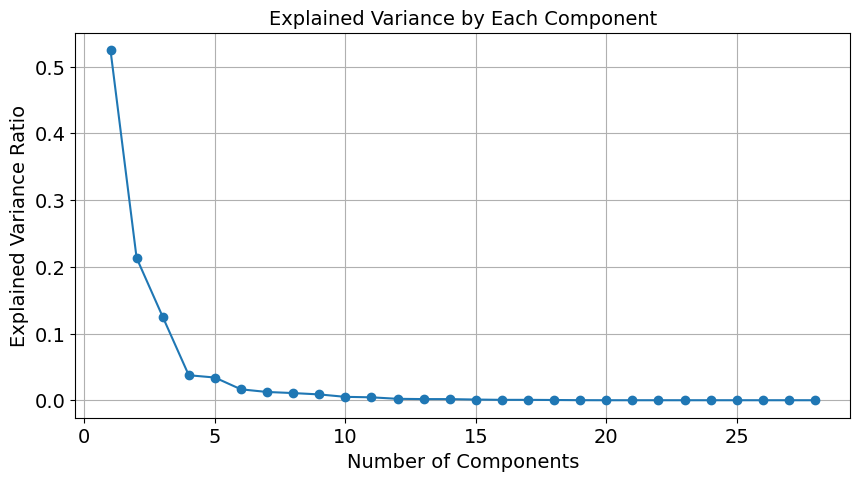

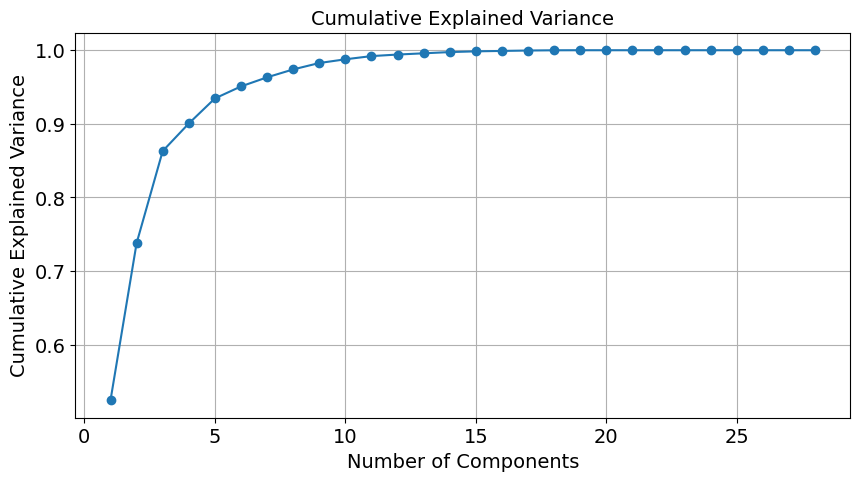

In [10]:
# Plot Explained Variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Explained Variance')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance Ratio', fontsize=14)
plt.title('Explained Variance by Each Component', fontsize=14)
plt.grid(True)
plt.show()

# Plot Cumulative Explained Variance
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', label='Cumulative Variance')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Cumulative Explained Variance', fontsize=14)
plt.grid(True)
plt.show()


**Explained variance Plot**:

- Displays the amount of information (variance) each component captures from the original dataset.
- Higher variance indicates that the component captures more informations - making it more valuable for dimensionality reduction.

**Cummulative Explained Variance**:

- Displays the cummulative sum of explained variance as each component is added.
- Helps us understand how many components are required to reach a desired variance threshold.

**Interpretation**:

- Both the plots are used to decide the number of components needed to capture the desired percentage of the total variance.
- We can decide on the number of components based on the elbow of the plot or by setting a specific variance threshold we want to achieve.
- By reducing dimensions to this optimal number, we can simplify the dataset while preserving most the original information, improiving computational.

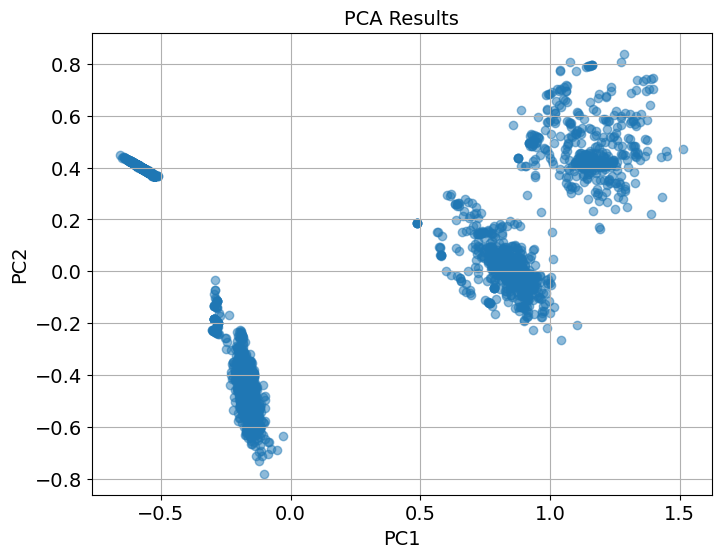

In [11]:
# Plot PCA results in 2D space using the first 2 principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("PCA Results", fontsize=14)    
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
plt.grid(True)
plt.show()

The PCA scatter plot shows the projection of the high-dimensional (28 features) onto th first 2 principal components. 

**Interpretation**:

-	The plot reveals clear clusters in the data, indicating that there are distinct patterns or groups among pit stop data. 
-	Since the features include lap numbers, pit stop counts, durations, and times, the clustering likely reflects drivers with similar pit stop strategies or lap time behavior. Difference in pit stop durations, frequency, and lap performance might have contributed to the visible groupings. 
-	This PCA plot validates that the first two components effectively reduce the complexity of the data while preserving its structure. 

**Next Steps**:

Use Clustering algorithms to formally identify groups in the lower dimensional space, these clusters can further be compared to the actual race outcomes – finish positions. 


## t-SNE

**t-Distributed Stochastic Neighbor Embedding** (t-SNE) is an unsupervised machine learning technique designed for non-linear dimensionality reduction, often used for visualizing high-dimensional data in lower dimensions.

**Process**:

- t-SNE begins by computing the pairwise similarities between data points in the original high-dimensional space. These similarities are modeled using probability distributions.
- To preserve these relationships in the lower-dimensional space (e.g., 2D or 3D), t-SNE represents pairwise similarities using the **Student-t distribution**. This distribution, known for its heavier tails compared to Gaussian distributions, ensures that dissimilar points are pushed farther apart while similar points remain clustered together.
- The algorithm aims to minimize the **Kullback-Leibler (KL) divergence**, a measure of difference between two probability distributions, ensuring the lower-dimensional embedding closely reflects the structure of the original space.
  
**Hyperparameter**: Perplexity

Perplexity controls the balance between local and global relationships in the data. Lower perplexity values emphasize local patterns (small clusters), whereas higher perplexity values account for broader structures.



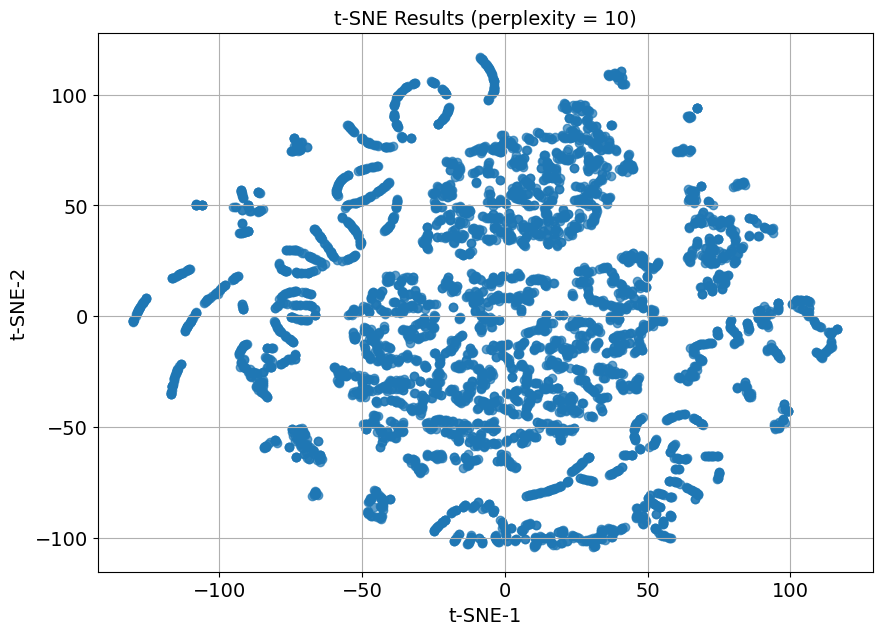

In [19]:
# Apply t-SNE

# n_components=2 = reduces the data to 2D space
# random_state=123 = for reproducibility
# perplexity=10 = hyperparameter - controls the number of neighbours considered
# it influences the balance between local and gloabl structure preservation
tsne = TSNE(n_components=2, random_state=123, perplexity=10)

# apply t-SNE transformation
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("t-SNE Results (perplexity = 10)", fontsize=14)
plt.xlabel("t-SNE-1", fontsize=14)
plt.ylabel("t-SNE-2", fontsize=14)
plt.grid(True)
plt.show()

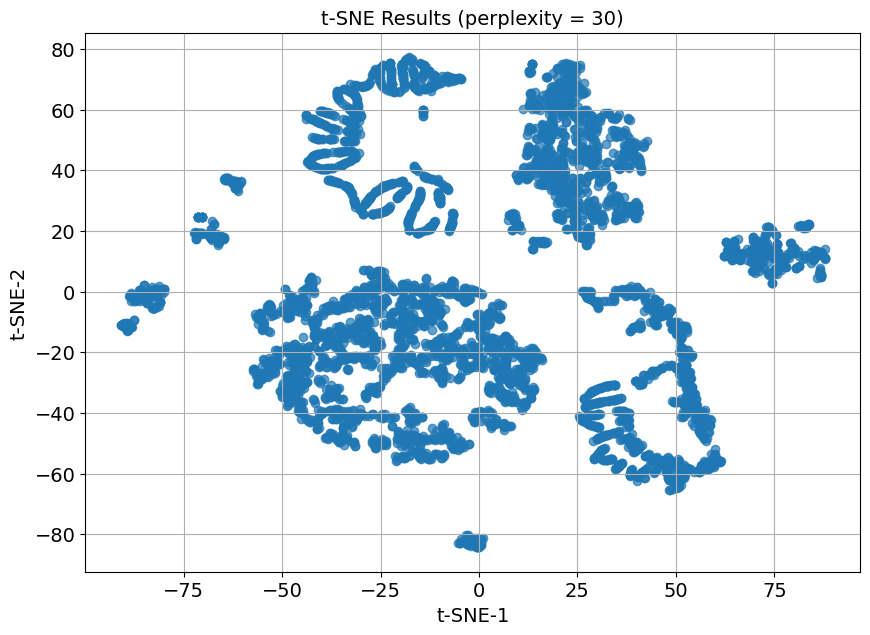

In [20]:
# higher perplexity
tsne = TSNE(n_components=2, random_state=123, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results
# Plot t-SNE results
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("t-SNE Results (perplexity = 30)", fontsize=14)
plt.xlabel("t-SNE-1", fontsize=14)
plt.ylabel("t-SNE-2", fontsize=14)
plt.grid(True)
plt.show()

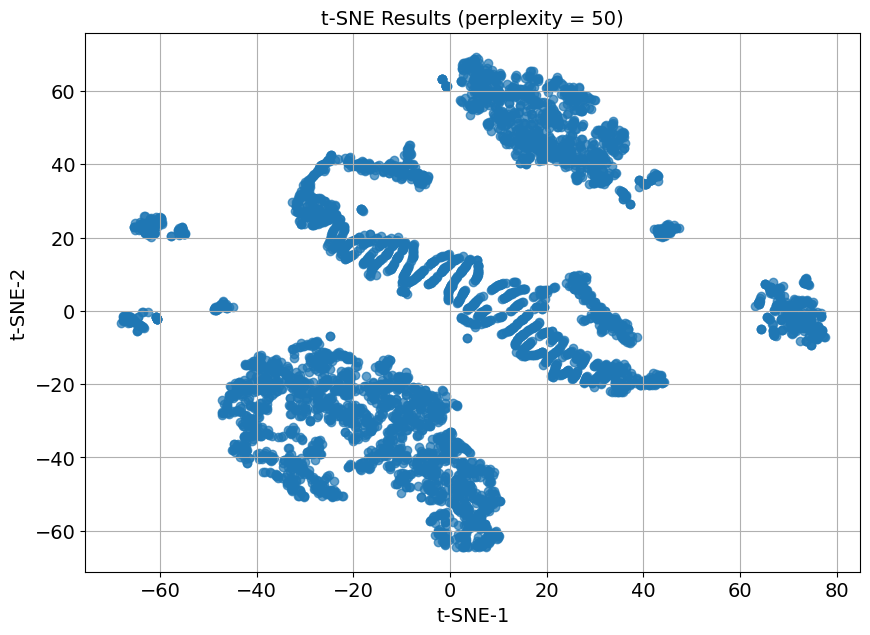

In [21]:
# higher preplexity
tsne = TSNE(n_components=2, random_state=123, perplexity=50)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results
plt.figure(figsize=(10, 7))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("t-SNE Results (perplexity = 50)", fontsize=14)
plt.xlabel("t-SNE-1", fontsize=14)
plt.ylabel("t-SNE-2", fontsize=14)
plt.grid(True)
plt.show()

**Interpretation**:

1.	**Perplexity = 10**:
-	At a lower perplexity, the data is more dispersed with distinct local clusters. 
-	Smaller groups of points are clearly formed, but there are scattered points and fewer global patterns.

2.	**Perplexity = 30**:
-	Several well-defined clusters with clear separation between them.
-	The structure of the data is more interpretable as it highlights both local and global trends. 

3.	**Perplexity = 50**:
-	At a higher perplexity, the algorithm focuses more on global relationships in the data. There is a smoother, broader organization of the data, but fine-grained patters are less visible. 

**Insights**:

- The variation in perplexity directly affects the way the algorithm balances local and global relationships.
- The presence of clearly separated clusters across all three plots suggests that the features contain inherent groupings.


## PCA vs t-SNE

**PCA** is particularly effective at preserving the overall global structure of the data, highlighting large-scale patterns based on variance across features. However, because it relies on linear projections, PCA struggles to capture complex or non-linear relationships within the data.

**t-SNE** is well-suited for capturing the local structure of data. Unlike PCA, it is a non-linear technique that identifies clusters and relationships that may not be apparent through linear methods. 

In summary, PCA and t-SNE are complementary techniques. PCA is ideal for global variance-based analysis and dimensionality reduction, while t-SNE is better for exploring hidden local structures and clusters. Together, they provide a robust approach for understanding complex datasets.


# Clustering

## Introduction
**Clustering** techniques identify hidden patterns or natural groupings within data, providing critical insights without requiring labeled information. It is widely applied in data analysis to explore relationships, reduce dimensionality, and uncover actionable insights.


Clusters are characterized by two main properties:

**Cohesion**:

Measures how closely related data points are within the same cluster.
High cohesion indicates that the points within a cluster are similar to each other.
Typically evaluated using intra-cluster distances, where a lower distance implies higher cohesion.

**Separation**:

Measures how distinct or well-separated a cluster is from other clusters.
High separation indicates clear boundaries between clusters.
Typically evaluated using inter-cluster distances, where larger distances signify better separation.


**Types of Clustering Methods**

 - **Distance-Based Clustering**
   - Relies on distance measures (e.g., Euclidean distance) to form clusters.
    - K-Means Clustering: Partitions data into k clusters by minimizing the variance (intra-cluster distance) within each cluster.Efficient for large datasets but assumes convex-shaped clusters and requires the number of clusters (k) in advance.
    - Hierarchical Clustering: Builds a hierarchy of clusters represented as a tree or dendrogram.
      - Agglomerative (bottom-up): Starts with individual points and merges clusters iteratively.
      - Divisive (top-down): Starts with one cluster and splits it iteratively.

- **Density-Based Clustering**
  - Groups points based on areas of high point density and identifies sparse regions as noise (outliers).
  - DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
Groups closely packed points into clusters while marking points in low-density regions as noise. Does not require specifying the number of clusters and works well for arbitrarily shaped clusters.
  - OPTICS (Ordering Points To Identify the Clustering Structure): Similar to DBSCAN but can handle clusters of varying densities.

- **Model-Based Clustering**
  - Assumes that data is generated from an underlying probabilistic model, often involving distributions.
  - Gaussian Mixture Models (GMM): Assumes data is generated from a mixture of several Gaussian distributions with unknown parameters. Clusters are modeled as probabilistic regions based on the Gaussian components.

- **Grid-Based Clustering**
  - Divides the data space into a grid structure and performs clustering on the grid cells.
  - CLIQUE (Clustering In QUEst): Efficiently handles high-dimensional data by partitioning the data space into a grid and identifying dense regions.
  
- **Spectral Clustering**
  - Uses graph theory and the eigenvalues of a similarity matrix to transform data into a lower-dimensional space.
  - Clustering algorithms like K-Means are then applied in this reduced space.
  - Effective for non-convex and complex-shaped clusters.


**Evaluation Metrics**

- **Inertia (Within-Cluster Sum of Squares)**: Measures the compactness of clusters by summing the squared distances between points and their cluster centroids. Lower inertia indicates higher cohesion.
  
- **Silhouette Score**: Measures how well each data point fits within its assigned cluster versus how far it is from neighboring clusters. The silhouette score ranges from -1 to 1, where higher values indicate better-defined clusters.
  
- **Davies-Bouldin Index**: Evaluates both intra-cluster distances (cohesion) and inter-cluster distances (separation). A lower Davies-Bouldin Index indicates better clustering.
  
- **Calinski-Harabasz Index**: Measures the ratio of inter-cluster separation to intra-cluster cohesion. Higher values indicate better clustering results.

## KMeans 
Applied to the data reduced to 2D space using the PCA algorithm.

KMeans is a distance-based unsupervised clustering algorithm that partitions a dataset into kkk clusters by minimizing the intra-cluster variance, also known as inertia. The algorithm iteratively refines cluster centroids to find an optimal partition of the data. KMeans aims to ensure that data points within a cluster are as close as possible to the centroid, while centroids of different clusters are as far apart as possible.

**Process**:

-	Initialize k centroids randomly.
-	Assign each data point to the nearest centroid based on a distance metric, typically Euclidean distance.
-	Recalculate the centroids as the mean position of all points assigned to each cluster.
-	Repeat the assignment and centroid update steps until convergence, i.e., when centroids no longer change significantly or a predefined number of iterations is reached.

**Evaluation Metrics Used**

 1. **Inertia (Within-Cluster Sum of Squares)**: Measures the compactness of clusters by summing the squared distances between points and their cluster centroids. Lower inertia indicates higher cohesion.
  
2. **Silhouette Score**: Measures how well each data point fits within its assigned cluster versus how far it is from neighboring clusters. The silhouette score ranges from -1 to 1, where higher values indicate better-defined clusters.


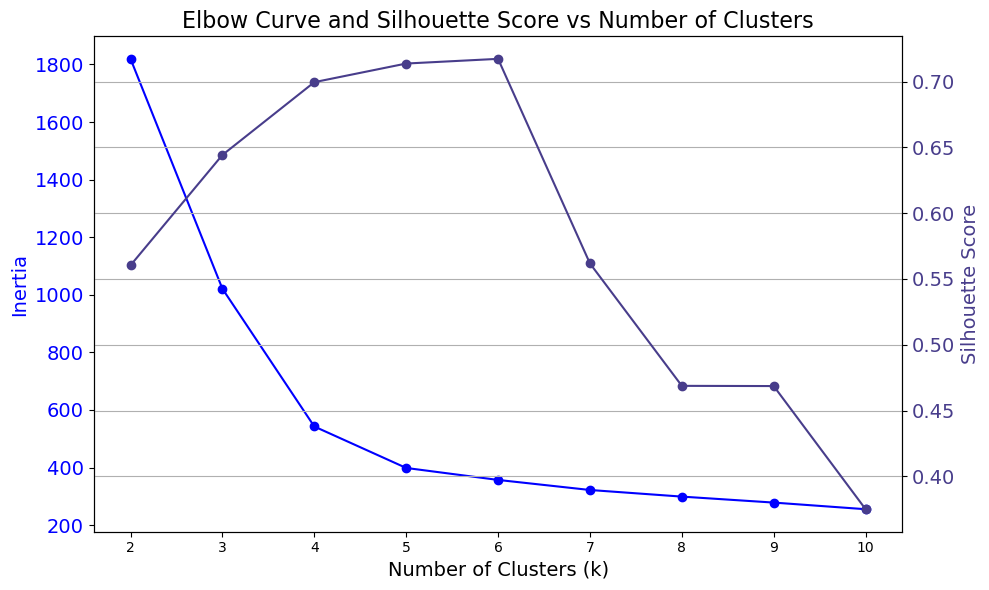

In [22]:
# evaluate using elbow method and silhouette score
def kmeans_elbow_silhouette(X, cluster_range):

    # initialize lists to store results
    inertia_scores = []
    silhouette_scores = []

    # iterate over the range of cluster values
    for k in cluster_range:
        # initialize and fit KMeans
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=5000)
        labels = kmeans.fit_predict(X)

        # calculate inertia
        inertia_scores.append(kmeans.inertia_)

        # calculate silhouette score if there are more than 1 cluster
        if len(set(labels)) > 1:
            silhouette_scores.append(silhouette_score(X, labels))
        else:
            silhouette_scores.append(-1)  # Assign a low score for invalid clusters

    # plot Elbow Curve and Silhouette Score
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Elbow Curve - Inertia
    ax1.plot(cluster_range, inertia_scores, 'blue', marker='o', label='Inertia')
    ax1.set_xlabel("Number of Clusters (k)", fontsize=14)
    ax1.set_ylabel("Inertia", color="blue", fontsize=14)
    ax1.tick_params(axis="y", labelcolor="blue", labelsize=14)

    # Silhouette Score Curve - on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(cluster_range, silhouette_scores, 'darkslateblue', label='Silhouette Score', marker='o')
    ax2.set_ylabel("Silhouette Score", color='darkslateblue', fontsize=14)
    ax2.tick_params(axis="y", labelcolor='darkslateblue', labelsize=14)

    # Title and grid
    plt.title("Elbow Curve and Silhouette Score vs Number of Clusters", fontsize=16)
    plt.grid(True)
    fig.tight_layout()
    plt.show()

# range of clusters to evaluate
cluster_range = range(2, 11)  
kmeans_elbow_silhouette(X, cluster_range)


**Interpretation**

1.	Elbow Method:

- The Inertia curve (blue line) decreases sharply as the number of clusters increases, indicating that adding clusters reduces intra-cluster distances.
- However, the reduction in inertia slows down noticeably around k=4, forming an "elbow" in the curve. This point indicates that increasing the number of clusters beyond k=4 provides diminishing returns in terms of variance reduction.
  
2.	Silhouette Score:
- The Silhouette Score curve (dark slate blue) evaluates cluster cohesion and separation. The score peaks at around k=6, reaching approximately 0.72, which is a strong indication of well-defined clusters.
- However, the silhouette score for k=4 is also high (~0.70), and beyond k=6, the score declines, suggesting a decrease in clustering quality.

**Conclusion**:
-	Based on the Elbow Method and Silhouette Score, k=4 is chosen as the optimal number of clusters.
- This decision balances minimizing intra-cluster distances (inertia) and maintaining well-separated, cohesive clusters, while ensuring computational efficiency and interpretability.


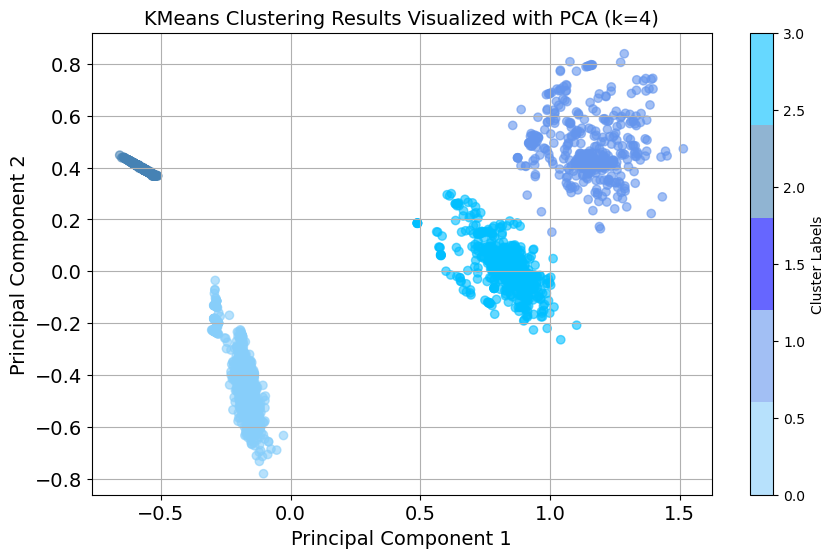

Silhouette Score for KMeans on PCA-transformed Data: 0.700


In [26]:
# kmeans with optimnal k (= 4)
kmeans = KMeans(n_clusters=4, n_init=10, random_state=123)
kmeans_labels = kmeans.fit_predict(X_pca)

# Visualize clustering results on PCA-transformed data
custom_colors = ["lightskyblue", "cornflowerblue", "blue", "steelblue", "deepskyblue"]
custom_cmap = ListedColormap(custom_colors)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, alpha=0.6, cmap=custom_cmap)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.title(f'KMeans Clustering Results Visualized with PCA (k=4)', fontsize=14)
plt.colorbar(scatter, label="Cluster Labels")
plt.grid(True)
plt.show()

# Evaluate silhouette score
sil_score = silhouette_score(X_pca, kmeans_labels)
print(f"Silhouette Score for KMeans on PCA-transformed Data: {sil_score:.3f}")

The clusters are well-separated, suggesting that KMeans has effectively grouped the data points. 

In [29]:
# analysing clusters
df_transformed['Cluster'] = kmeans_labels
df_transformed.drop(columns=['Unnamed: 0'], inplace=True)
print(df_transformed.head())



   Year  Round               RaceName     DriverID      Lap1      Lap2  \
0  2011      1  Australian Grand Prix  alguersuari  0.000000  0.229730   
1  2011      1  Australian Grand Prix       alonso  0.174603  0.364865   
2  2011      1  Australian Grand Prix     ambrosio  0.206349  0.513514   
3  2011      1  Australian Grand Prix  barrichello  0.190476  0.310811   
4  2011      1  Australian Grand Prix        buemi  0.222222  0.391892   

       Lap3      Lap4  Lap5  Lap6  ...  Time6  Time7  Duration1  Duration2  \
0  0.479452  0.000000   0.0   0.0  ...    0.0    0.0   0.453661   0.428042   
1  0.575342  0.000000   0.0   0.0  ...    0.0    0.0   0.392151   0.432766   
2  0.000000  0.000000   0.0   0.0  ...    0.0    0.0   0.426017   0.462739   
3  0.383562  0.512821   0.0   0.0  ...    0.0    0.0   0.398762   0.662386   
4  0.000000  0.000000   0.0   0.0  ...    0.0    0.0   0.427417   0.404192   

   Duration3  Duration4  Duration5  Duration6  Duration7  Cluster  
0   0.457423   0.0

In [35]:
# descriptive statistics - Laps
cluster_summary = df_transformed.groupby('Cluster').describe()

selected_features = ['Lap1', 'Lap2']

filtered_summary = cluster_summary[selected_features]

filtered_summary.T

Cluster               0           1            2            3
Lap1 count  2023.000000  409.000000  1673.000000  1013.000000
     mean      0.218472    0.101409     0.361332     0.147025
     std       0.123682    0.103965     0.166313     0.101554
     min       0.000000    0.000000     0.000000     0.000000
     25%       0.142857    0.015873     0.253968     0.063492
     50%       0.206349    0.095238     0.365079     0.142857
     75%       0.285714    0.158730     0.476190     0.206349
     max       0.841270    0.698413     1.000000     0.555556
Lap2 count  2023.000000  409.000000  1673.000000  1013.000000
     mean      0.486132    0.238188     0.000000     0.345655
     std       0.141812    0.161187     0.000000     0.141362
     min       0.027027    0.027027     0.000000     0.027027
     25%       0.405405    0.108108     0.000000     0.256757
     50%       0.472973    0.243243     0.000000     0.351351
     75%       0.567568    0.337838     0.000000     0.418919
     max       1.000000    0.837838     0.000000     0.851351

In [37]:
# descriptive statistics - Duration
cluster_summary = df_transformed.groupby('Cluster').describe()

selected_features = ['Duration2', 'Duration1']

filtered_summary = cluster_summary[selected_features]

filtered_summary.T

Cluster                    0           1            2            3
Duration2 count  2023.000000  409.000000  1673.000000  1013.000000
          mean      0.412609    0.359939     0.000000     0.404845
          std       0.107918    0.152168     0.000000     0.116942
          min       0.000000    0.000000     0.000000     0.000000
          25%       0.384980    0.321482     0.000000     0.373274
          50%       0.409424    0.372697     0.000000     0.405452
          75%       0.440264    0.429564     0.000000     0.442862
          max       1.000000    0.990551     0.000000     0.974559
Duration1 count  2023.000000  409.000000  1673.000000  1013.000000
          mean      0.405394    0.381307     0.420707     0.387143
          std       0.098226    0.137291     0.079428     0.126414
          min       0.000000    0.000000     0.000000     0.000000
          25%       0.372940    0.339512     0.374256     0.357289
          50%       0.397548    0.380361     0.402523     0.391071
          75%       0.430698    0.431769     0.455364     0.434923
          max       0.956469    0.987722     1.000000     0.931372

## DBSCAN 
Applied to the data reduced to 2D space using the PCA algorithm

**Density-Based Spatial Clustering of Applications with Noise (DBSCAN)** is a clustering algorithm that identifies clusters based on the density of data points. Unlike K-Means, which requires the number of clusters to be predefined, DBSCAN automatically detects clusters of arbitrary shapes and sizes and can identify outliers (noise) in the data.
 

**Hyperparameters**: 

-	Epsilon (ε): The maximum distance between two points for them to be considered as neighbors.
-	MinPts: The minimum number of points required to form a dense region (a cluster).


**Types of Points**:

1.	Core Points: A point is a core point if it has at least MinPts neighbors within distance ε.
2.	Border Points: A point that is within ε of a core point but does not meet the MinPts requirement itself.
3.	Noise Points: Any point that is neither a core point nor a border point is treated as noise or an outlier.
DBSCAN groups points into clusters by iteratively expanding the dense regions (clusters) starting from core points.
 
**Key Characteristics**:

- Density-Based: Works well for identifying clusters of arbitrary shapes (e.g., circular, elongated).
- Noise Detection: Automatically identifies outliers as noise, which is useful for datasets with anomalies.
- No Need to Specify k: Unlike K-Means, DBSCAN does not require the number of clusters as input.
- Parameter Sensitivity: The choice of ε and MinPts can significantly impact results and requires tuning.


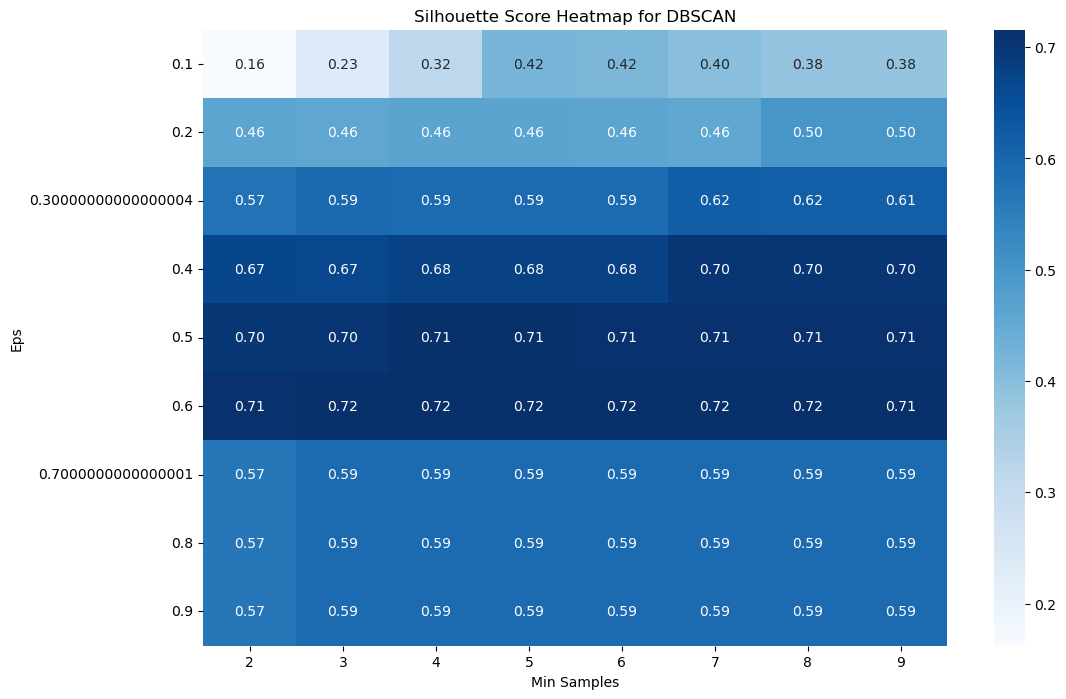

Best Silhouette Score: 0.7156373392601885
Optimal eps: 0.6
Optimal min_samples: 3


In [24]:
def optimize_dbscan_with_heatmap(X, eps_range, min_samples_range):
    best_score = -1
    best_eps = None
    best_min_samples = None
    best_labels = None
    best_cluster_count = None

    # initialize a dictionary to store silhouette scores for heatmap
    score_dict = {}

    # loop through each eps value in the range
    for eps in eps_range:
        score_dict[eps] = []
        # loop through min_samples values
        for min_samples in min_samples_range:
            # Initialize DBSCAN
            model = DBSCAN(eps=eps, min_samples=min_samples)
            labels = model.fit_predict(X)

            # calculate silhouette score if there are more than 1 cluster
            if len(set(labels)) > 1: 
                score = silhouette_score(X, labels)
            else:
                score = -1  
            # append the score to score dictionary
            score_dict[eps].append(score)

            # update the score if a better score if found
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_labels = labels
                # count clusters excluding noise
                best_cluster_count = len(set(labels)) - (1 if -1 in labels else 0)

    # convert the score dictionary to a DataFrame for heatmap
    score_df = pd.DataFrame(score_dict, index=min_samples_range).T

    # plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(score_df, annot=True, fmt=".2f", cmap="Blues", xticklabels=min_samples_range, yticklabels=eps_range)
    plt.title("Silhouette Score Heatmap for DBSCAN")
    plt.xlabel("Min Samples")
    plt.ylabel("Eps")
    plt.show()

    # output the optimal parameters
    print(f"Best Silhouette Score: {best_score}")
    print(f"Optimal eps: {best_eps}")
    print(f"Optimal min_samples: {best_min_samples}")

    return best_eps, best_min_samples, best_cluster_count, best_labels

eps_range = np.arange(0.1, 1.0, 0.1) 
min_samples_range = range(2, 10)  

best_eps, best_min_samples, best_cluster_count, best_labels = optimize_dbscan_with_heatmap(X, eps_range, min_samples_range)


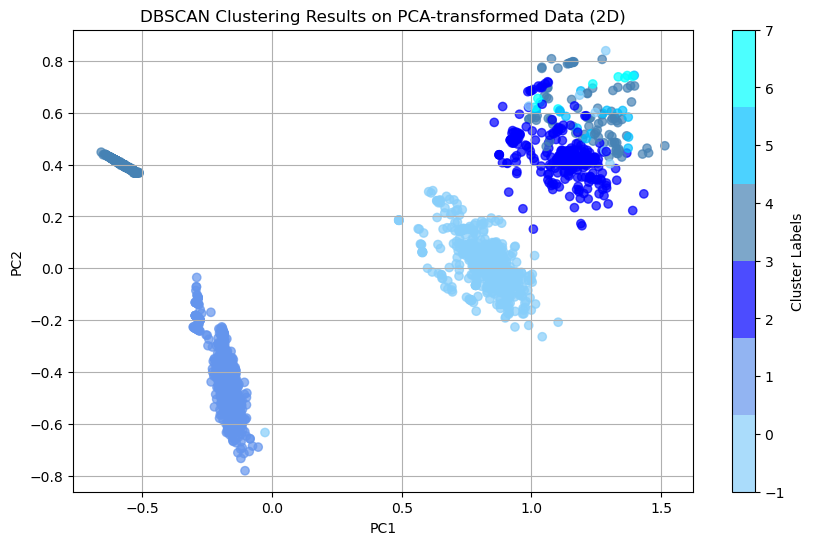

In [25]:
# apply DBCSAN with optimal paramters 
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(X_pca)

custom_colors = ["lightskyblue", "cornflowerblue", "blue", "steelblue", "deepskyblue", "cyan"]
custom_cmap = ListedColormap(custom_colors)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap=custom_cmap, alpha=0.7)
plt.title("DBSCAN Clustering Results on PCA-transformed Data (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster Labels")
plt.grid(True)
plt.show()


In [131]:
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"Number of clusters found: {num_clusters}")


Number of clusters found: 6


## Hierarchical Clustering


**Hierarchical Clustering** is an unsupervised machine learning technique used to group data into a hierarchy of clusters. It builds a tree-like structure called a dendrogram, which visually represents the relationships between data points and how clusters are formed step by step.

**Types**:

Agglomerative Clustering (Bottom-Up):

-	starts with each data point as an individual cluster.
-	Iteratively combines the closest clusters based on a distance metric.
-	Continues until all points are merged into a single cluster.
-	The dendrogram can be cut at different levels to obtain the desired number of clusters.

Divisive Clustering (Top-Down):

-	Starts with all data points in a single cluster.
-	Iteratively splits clusters into smaller subclusters until each data point becomes its own cluster.

**Distance Metric**
Common metrics include:

- Euclidean Distance: Measures the straight-line distance between points.
- Manhattan Distance: Measures distance as the sum of absolute differences.
- Cosine Distance: Measures the angle between two vectors.

**In this project**:
Hierarchical clustering is applied to understand groupings within the racetrack features dataset. 


In [38]:
# load the data
df = pd.read_csv("../../data/processed-data/race_track_features.csv")
df.drop(columns=['Unnamed: 7'], inplace=True)
df.head()

,Year,Grand Prix,Track Length (m),Max Speed (km/h),Full Throttle (%),Number of Corners,Number of Straights
0,2020,Pre-Season Test 1,-1.000607,-0.115670,1.059667,-0.789651,-0.938394
1,2020,Pre-Season Test 2,-1.000607,-0.115670,1.059667,-0.789651,-0.938394
2,2020,Austrian Grand Prix,-1.000607,-0.115670,1.059667,-0.789651,-0.938394
3,2020,Styrian Grand Prix,-1.024865,-1.840980,-1.757479,-0.275003,-0.037811
4,2020,Hungarian Grand Prix,-0.957039,-0.490737,-0.407433,-1.304300,-0.037811


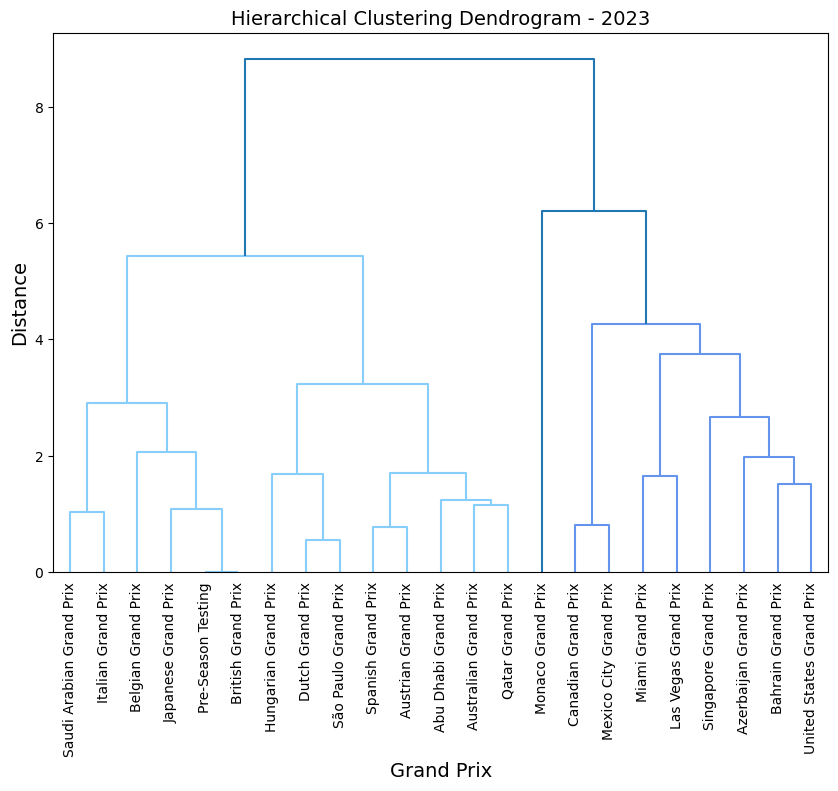

In [50]:
set_link_color_palette(["lightskyblue", "cornflowerblue", "blue", "steelblue"])

df = pd.read_csv("../../data/processed-data/race_track_features.csv")
# only circuits from 2023
df = df[df["Year"] == 2023]
df.dropna

# features used for clustering
features = ["Track Length (m)", "Max Speed (km/h)", "Full Throttle (%)", "Number of Corners", "Number of Straights"]
X = df[features]

# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ward's linkage method - minimizes variance within clusters
linkage_matrix = linkage(X_scaled, method='ward')  

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df["Grand Prix"].values, leaf_rotation=90, leaf_font_size=10,color_threshold=6)
plt.title("Hierarchical Clustering Dendrogram - 2023", fontsize = 14)

plt.xlabel("Grand Prix", fontsize = 14)
plt.ylabel("Distance", fontsize = 14)
plt.show()

max_distance = 5
clusters = fcluster(linkage_matrix, max_distance, criterion='distance')



In [51]:
# group circuits based on clusters
max_distance = 5
clusters = fcluster(linkage_matrix, max_distance, criterion='distance')
df["Cluster"] = clusters
grouped_df = df.groupby("Cluster")[features].mean()
grouped_df.T


Cluster,1,2,3,4
Track Length (m),1.116553,-0.524224,0.103169,-2.269306
Max Speed (km/h),0.884510,0.015604,0.793869,-2.591115
Full Throttle (%),0.877347,0.155178,-0.538241,-2.058832
Number of Corners,-0.360778,-0.853982,0.947287,2.298239
Number of Straights,-0.788297,-0.488102,0.750199,0.862772
